## 2.1. Data Manipulation


In [79]:
import torch

In [80]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [81]:
x.numel()

12

In [82]:
x.shape

torch.Size([12])

In [83]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [84]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [85]:
torch.randn(3, 4)

tensor([[-0.0812, -1.7875, -0.0046,  0.7750],
        [ 0.3557, -0.2719,  1.3228, -0.0726],
        [-0.1002, -0.7746, -1.1877,  0.8483]])

In [86]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [87]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [88]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [89]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [90]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [91]:
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [92]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [93]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [94]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [95]:
X.sum()

tensor(66.)

2.1.4. Broadcasting


In [96]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

2.1.5. Saving Memory¶

In [97]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [98]:

Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))
before = id(X)
X += Y
id(X) == before

id(Z): 137243045859376
id(Z): 137243045859376


True

2.1.6. Conversion to Other Python Objects


In [99]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)


(numpy.ndarray, torch.Tensor)

In [100]:

a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

1. Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.



In [132]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X<Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

2.Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

The result is as expected.


In [133]:
import torch

a = torch.arange(24).reshape((2, 3, 4))  # Shape (2, 3, 4)
b = torch.arange(8).reshape((2, 1, 4))   # Shape (2, 1, 4)

result = a + b

print(result)
print("Shape of Resulting Tensor:", result.shape)


tensor([[[ 0,  2,  4,  6],
         [ 4,  6,  8, 10],
         [ 8, 10, 12, 14]],

        [[16, 18, 20, 22],
         [20, 22, 24, 26],
         [24, 26, 28, 30]]])
Shape of Resulting Tensor: torch.Size([2, 3, 4])


### 2.2. Data Preprocessing

2.2.1. Reading the Dataset


In [101]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


2.2.2. Data Preparation


In [102]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1
   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


2.2.3. Conversion to the Tensor Format¶


In [103]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

2.2.5. Exercises

1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?
  There are no missing values
  Th  column is type object for sex can be interpreted as categorical. The rest are all numerical data as ints and floats.



In [104]:
import pandas as pd
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
response = requests.get(url)

with open('abalone.csv', 'w') as f:
    f.write(response.text)

df = pd.read_csv('abalone.csv')
print(df)
dataset_info = df.info()
missing_values = df.isna().mean()
variable_types = df.dtypes

print("Dataset Information:")
print(dataset_info)

print("\nFraction of Missing Values:")
print(missing_values)

print("\nVariable Types:")
print(variable_types)


      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       41


2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.

In [105]:
import pandas as pd

# Load the Abalone dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, names=column_names)

# Select columns by name
selected_columns = df[['Sex', 'Length', 'Diameter']]

print("Selected Columns:")
print(selected_columns.head())


Selected Columns:
  Sex  Length  Diameter
0   M   0.455     0.365
1   M   0.350     0.265
2   F   0.530     0.420
3   M   0.440     0.365
4   I   0.330     0.255



3. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?

I would imagine that the RAM is the primary limiting factor on my computer. Furthermore, The loading of dataset would be dependandant on the efficiency of my code, the data type/structure of my dataset. I would imagine that an extremely large dataset could be handled much better by a server or even distributing the processing workload to multiple machines



4. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?

I would probably want to use some form of hashing or reduction of dimensionality if my problem enabled me to do so. Or I would like to transform the high-cardinality categorical variables into lwoer-dimensional vectors.

Including all the category labels couls lead to overfitting, a need for a more powerful system, or difficulty to interpret.

5. What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.

I could use Numpy or dask. Loading numpy tensors from another files could definitely work well with numerical data in particular. Pillow looks like that it would be a useful library when working withj images and performing different image processing tasks.

# 2.3 Linear Algebra

2.3.1. Scalars¶


In [106]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y




(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

2.3.2. Vectors


In [107]:
x = torch.arange(3)
x

x[2]

len(x)

x.shape

torch.Size([3])

2.3.3. Matrices

In [108]:
A = torch.arange(6).reshape(3, 2)
A

A.T

A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

2.3.4. Tensors


In [109]:
torch.arange(24).reshape(2, 3, 4)


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

2.3.5. Basic Properties of Tensor Arithmetic


In [110]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

A * B

a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

2.3.6. Reduction


In [111]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

A.shape, A.sum()

A.shape, A.sum(axis=0).shape

A.shape, A.sum(axis=1).shape

A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

A.mean(), A.sum() / A.numel()

A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

2.3.7. Non-Reduction Sum


In [112]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

A / sum_A

A.cumsum(axis=0)



tensor([[0., 1., 2.],
        [3., 5., 7.]])

2.3.8. Dot Products


In [113]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

torch.sum(x * y)

tensor(3.)

2.3.9. Matrix–Vector Products


In [114]:
A.shape, x.shape, torch.mv(A, x), A@x


(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

2.3.10. Matrix–Matrix Multiplication


In [115]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

2.3.11. Norms


In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

torch.abs(u).sum()

torch.norm(torch.ones((4, 9)))



# 2.3.13 Exercises

1.   Prove that the transpose of the transpose of a matrix is the matrix itself:
The transponse of A is done so by swapping the rows and columns, so taking the transpose of A^T means swapping the swapped rows and columns back which undeos the previous transposition. The final result should be what we once started with.


2. Given two matrices
 and
, show that sum and transposition commute:



3. Given any square matrix
, is
 always symmetric? Can you prove the result by using only the results of the previous two exercises?

4. We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)? Write your answer without implementing any code, then check your answer using code.


In [116]:
X = torch.arange(24).reshape(2, 3, 4)
X
len(X)


2


5. For a tensor X of arbitrary shape, does len(X) always correspond to the length of a certain axis of X? What is that axis?
It always corresponds to the first axis, or the first dimension of the matrix


In [119]:
X = torch.arange(24).reshape(3, 2, 4)
print(X)

print(len(X))

X = torch.arange(24).reshape(4, 3, 2)
print(X)

print(len(X))

#

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])
3
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]],

        [[18, 19],
         [20, 21],
         [22, 23]]])
4


6. Run A / A.sum(axis=1) and see what happens. Can you analyze the results?
It fails because A has 4 columns, while A.sum has 5

In [120]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A / A.sum(axis=1)






RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1


7. When traveling between two points in downtown Manhattan, what is the distance that you need to cover in terms of the coordinates, i.e., in terms of avenues and streets? Can you travel diagonally?

The sum of the vertical difference and the horizontal difference. You cannot travel diagonally unless there is a diagonal road, but I am assuming that downtown Manhattan is a metaphor for a matrix.



8. Consider a tensor of shape (2, 3, 4). What are the shapes of the summation outputs along axes 0, 1, and 2?


In [121]:
X = torch.arange(24).reshape(4, 3, 2)
print(X)
print(X.sum(axis=0))
print(X.sum(axis=1))
print(X.sum(axis=2))



tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]],

        [[18, 19],
         [20, 21],
         [22, 23]]])
tensor([[36, 40],
        [44, 48],
        [52, 56]])
tensor([[ 6,  9],
        [24, 27],
        [42, 45],
        [60, 63]])
tensor([[ 1,  5,  9],
        [13, 17, 21],
        [25, 29, 33],
        [37, 41, 45]])



9. Feed a tensor with three or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?

It likely computes the norm of any given tensor.


In [122]:
import numpy as np

X = torch.arange(24).reshape(4, 3, 2)
X

np.linalg.norm(X)

X = torch.arange(48).reshape(4, 3, 2, 2)
X
np.linalg.norm(X)



188.9973544788392


10. Consider three large matrices, say
,
A is of size (2^10 x 2^16)
B is of size (2^16 x 2^5)
C is of size (2^5 x 2^14)
 and
, initialized with Gaussian random variables. You want to compute the product
. Is there any difference in memory footprint and speed, depending on whether you compute
 or
. Why?

In the case of (AB)C, you need to store an intermediate result of size (2^10 x 2^5).

In the case of A(BC), you need to store an intermediate result of size (2^16 x 2^14).

(AB)C requires less memory and we can assume that it will be faster



11. Consider three large matrices, say
,
 and
. Is there any difference in speed depending on whether you compute
 or
? Why? What changes if you initialize
 without cloning memory? Why?

AB results in a matrix of size (2^10 x 2^5). AC^T results in a matrix (2^10 x 2^5). The size of both of the results are the same, but we can assume that needing to transpose a matrix on top of the basic matrxi multiplication will require more memory and will take longer.


12. Consider three matrices, say
. Construct a tensor with three axes by stacking
. What is the dimensionality? Slice out the second coordinate of the third axis to recover
. Check that your answer is correct.

The dimensionality is 3

In [128]:
import numpy as np

a = np.random.rand(100, 200)
b = np.random.rand(100, 200)
c = np.random.rand(100, 200)

tensor = np.stack([a, b, c])

tensor_dimensions = tensor.shape

recovered_b = tensor[1, :, :]

is_b_recovered = np.array_equal(recovered_b, b)

tensor_dimensions, is_b_recovered


((3, 100, 200), True)

#2.4. Calculus

1. So far we took the rules for derivatives for granted. Using the definition and limits prove the properties for

(i) f(x)=c,

f'(x)= h→0lim[f(x+h)-f(x)]/h  
f'(x)= h→0lim c-c/h = 0

(ii) f(x)=x^n

f'(x) = lim(h -> 0) [(x + h)^n - x^n] / h
f'(x) = lim(h -> 0) [(x^n + nx^(n-1)h + ...) - x^n] / h

 = nx^(n-1)

(iii) f(x)=e^x

f'(x) = lim(h -> 0) [e^(x + h) - e^x] / h

f'(x) = lim(h -> 0) [e^x * e^h - e^x] / h

f'(x) = e^x * lim(h -> 0) [e^h - 1] / h

f'(x) = e^x * 1 = e^x




 and (iv) f(x)=logx.


f'(x) = lim(h -> 0) [log(x + h) - log(x)] / h

f'(x) = lim(h -> 0) [log((x + h)/x)] / h


lim(h -> 0) [log(1 + h/x)] / h = 1/x * lim(h -> 0) [log(1 + h/x)] / (h/x) =1/x * lim(h -> 0) [log(1 + 0)] / 0 = 1/x * 0

=0








2. In the same vein, prove the product, sum, and quotient rule from first principles.

Product rule

(uv)' = u'v + uv'

(uv)' = lim(h -> 0) [(uv)(x + h) - (uv)(x)] / h


(uv)' = lim(h -> 0) [u(x + h)v(x + h) - u(x)v(x)] / h


lim(h -> 0) [u(x + h)v(x + h) - u(x)v(x)] / h = lim(h -> 0) [u(x + h)v(x + h) - u(x)v(x)] / lim(h -> 0) h


(uv)' = u'(x)v(x) + u(x)v'(x)

Sum Rule

(u + v)' = u' + v'

(u + v)' = lim(h -> 0) [(u + v)(x + h) - (u + v)(x)] / h

(u + v)' = lim(h -> 0) [u(x + h) + v(x + h) - u(x) - v(x)] / h

lim(h -> 0) [u(x + h) + v(x + h) - u(x) - v(x)] / h = lim(h -> 0) [u(x + h) - u(x)] / h + lim(h -> 0) [v(x + h) - v(x)] / h

(u + v)' = u'(x) + v'(x)


Quotient Rule

(u / v)' = (u'v - uv') / (v^2)

(u / v)' = lim(h -> 0) [(u / v)(x + h) - (u / v)(x)] / h


(u / v)' = lim(h -> 0) [(u(x + h) / v(x + h)) - (u(x) / v(x))] / h

(u / v)' = lim(h -> 0) [(u(x + h)v(x) - u(x)v(x + h))] / (h * v(x + h)v(x))


(u / v)' = (u'v - uv') / v^2








3. Prove that the constant multiple rule follows as a special case of the product rule.

(d/dx)[c * f(x)] = c * (d/dx)[f(x)]

(g(x))' = (c * f(x))'


(g(x))' = c' * f(x) + c * (f(x))'

(g(x))' = 0 * f(x) + c * (f(x))'


(g(x))' = c * (f(x))'




4. Calculate the derivative of f(x)=x^x.

ln(y)=ln(x^x ).

ln(y)=xln(x).

d/dx [ln(y)]= d/dx [xln(x)].

1/y ⋅ dy/dx = d/dx ⋅ (x)⋅ln(x)+x⋅  d/dx ⋅ [ln(x)]

1/y ⋅ dy/dx =ln(x)+1

dy/dx =x^x ln(x)+1





5. What does it mean that
 for some
? Give an example of a function
 and a location
 for which this might hold.

 It holds that (x,f(x)) has a slope of zero. this is a local max or min at x

\ex: f(x)=x^2

f ′ (x)=2x

2x=0 at 0


6. Plot the function y = f(x) = x^3 -1/x and plot its tangent line at x=1.



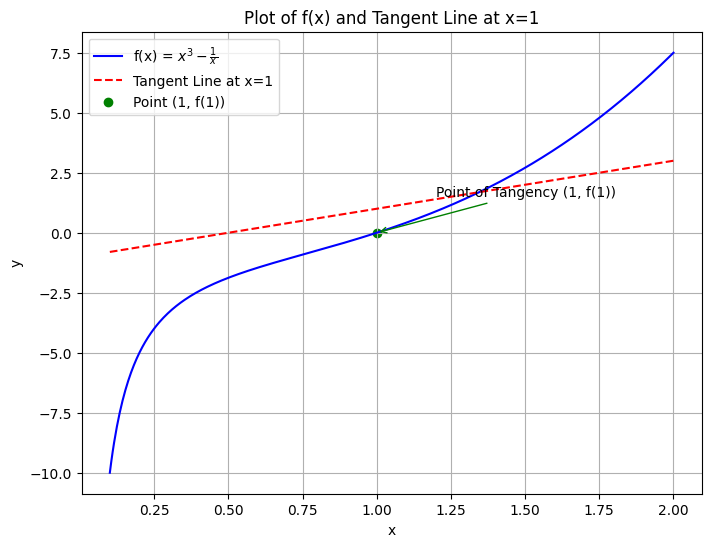

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1/x

def tangent_line(x):
    return 2*x - 1

x = np.linspace(0.1, 2, 400)
y = f(x)
tangent = tangent_line(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = $x^3 - \\frac{1}{x}$', color='blue')
plt.plot(x, tangent, label='Tangent Line at x=1', color='red', linestyle='--')
plt.scatter(1, f(1), color='green', marker='o', label='Point (1, f(1))')

plt.annotate('Point of Tangency (1, f(1))', xy=(1, f(1)), xytext=(1.2, 1.5),
             arrowprops=dict(arrowstyle='->', color='green'))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Plot of f(x) and Tangent Line at x=1')
plt.show()


7. Find the gradient of the function  f(x)3x1^2
+ 5e^x2.
d/dx1 = 6x1

d/dx2 = 5e ^x2

gradient = ( 6x1,5e ^x2)


8. What is the gradient of the function ||x||2? What happens for x=0?

gradient of ||x||2 =([x1 (||x||2)],[x2 (||x||2)],...,[xn (||x||2)],)

at 0 it would be undefined because we are dividing by 0


9. Can you write out the chain rule for the case where f(x,y,z) and x=x(a,b)y = y(a,b) , and z=z(a,b)?

df/da = df/dx  ⋅ dx/da +  df/dy  ⋅ dy/da +  df/dz  ⋅ dz/da

df/db = df/dx  ⋅ dx/db +  df/dy  ⋅ dy/db +  df/dz  ⋅ dz/db


10. Given a function f(x) that is invertible, compute the derivative of its inverse f^-1(x). Here we have that f^-1(f(x)) and conversely f^-1(f(y))=y. Hint: use these properties in your derivation.

d/dx[f^-1(y)]=d/dx[x]

d/dy[f^-1(y)]=d/dx[1]

dy/dx = 1/d/dy[f^-1(y)]

# 2.5 Automatic Differentiation

In [137]:
import torch

x = torch.arange(4.0)
x

# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

y = 2 * torch.dot(x, x)
y

y.backward()
x.grad

x.grad == 4 * x

x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u


x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()


a.grad == d / a

tensor(True)

1. Why is the second derivative much more expensive to compute than the first derivative?
Calculating the second derivative involves more complex calculations, such as differencing the first derivative twice. These additional calculations require more computational resources.

2. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
I receive an error.

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


In [140]:
y = 2 * torch.dot(x, x)
y
y.backward()
y.backward()



RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.


3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or a matrix? At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

There would be shape mismatch as a with respect to the x which we are taking the derivative with respect to is no longer a scalara nd there is a gradient or jacobian matrix.

to anlayze this situation we need to address the dimension and understand the relationships between a and d and the derivatives. The relationship between the two. The sensitivity of each element in the output needs to be considered to use deep learning

4. Let f(x)=sinx. Plot the graph of f and of its derivative f'. Do not exploit the fact that f'(x)=cos(x)
 but rather use automatic differentiation to get the result.


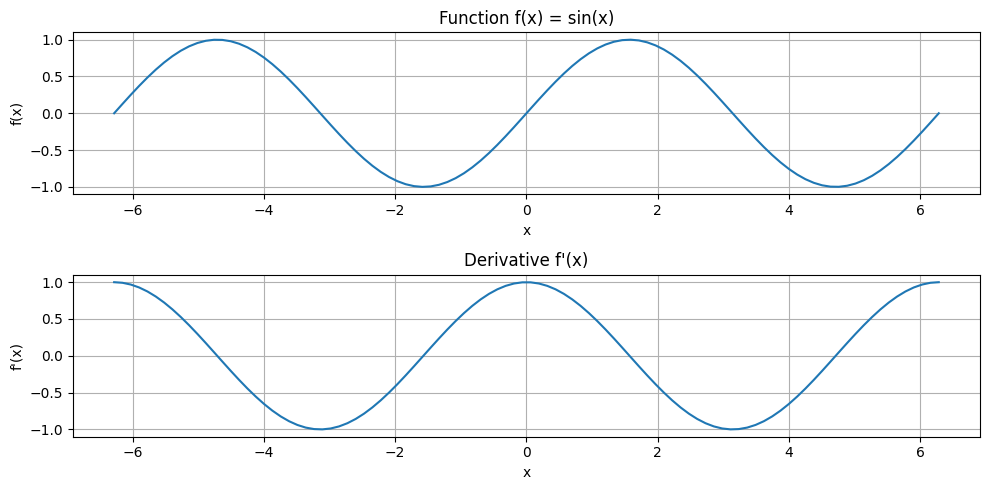

In [141]:
import torch
import matplotlib.pyplot as plt

# Define the input values (x)
x = torch.linspace(-2 * 3.1416, 2 * 3.1416, 100)
x.requires_grad_(True)  # Enable gradient tracking for x

# Define the function f(x) = sin(x)
f_x = torch.sin(x)

# Calculate the derivative of f(x) using automatic differentiation
f_x.backward(torch.ones_like(x))
f_prime_x = x.grad

# Plot the function f(x) and its derivative f'(x)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(x.detach().numpy(), f_x.detach().numpy(), label='f(x) = sin(x)')
plt.title('Function f(x) = sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x.detach().numpy(), f_prime_x.detach().numpy(), label="f'(x)")
plt.title("Derivative f'(x)")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()



5. Let f(x) = ((logx^2)sinx)+x^-1. Write out a dependency graph tracing results from x to f(x).

*  x (Input)
*   x^2 (Calculation from x)
* log(x^2) (Calculation from x^2)
* sin(x) (Calculation from x)
* (log(x^2) * sin(x)) (Result of multiplying 3 and 4)
* x^(-1) (Calculation from x)
* f(x) = (log(x^2) * sin(x)) + x^(-1) (Final result)

6. Use the chain rule to compute the derivative df/dx

 of the aforementioned function, placing each term on the dependency graph that you constructed previously.

df/dx = df/d(7) * d(7)/d(5) * d(5)/d(4) * d(4)/d(3) * d(3)/d(2) * d(2)/d(1)

df/d(7): The derivative of f(x) with respect to itself is 1.

d(7)/d(5): The derivative of f(x) with respect to (log(x^2) * sin(x)) is 1.

d(5)/d(4): The derivative of (log(x^2) * sin(x)) with respect to sin(x) is log(x^2).

d(4)/d(3): The derivative of sin(x) with respect to log(x^2) is sin(x).

d(3)/d(2): The derivative of log(x^2) with respect to x^2 is 1 / x^2.

d(2)/d(1): The derivative of x^2 with respect to x is 2x.

Finally , df/dx=2*sin(x)/x


7. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from x
 to f
 and once from f
 tracing back to x
. The path from x
 to f
 is commonly known as forward differentiation, whereas the path from f
 to x
 is known as backward differentiation.

 forward df/dx = -16 * cos(x) * log(x) / x^3

backward dx/df = -x^3 / (16 * cos(x) * log(x))

8. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.

Forward would be good for  when we want less memory intensive computations  and the input data is smaller in size. Backward would be good when we are implementing deep learning models with numerous parameters and layers, working with large datasets and complex neural netowrk acchirectures.

# 2.6 Probability and Statistics

1. Give an example where observing more data can reduce the amount of uncertainty about the outcome to an arbitrarily low level.

The estimation of the likelihood of a coin.

2. Give an example where observing more data will only reduce the amount of uncertainty up to a point and then no further. Explain why this is the case and where you expect this point to occur.

Estimating the gender ration in a population.

3. We empirically demonstrated convergence to the mean for the toss of a coin. Calculate the variance of the estimate of the probability that we see a head after drawing
 samples.

Variance = np(1 - p) = n * (0.5) * (1 - 0.5) = n * 0.25

How does the variance scale with the number of observations?

It scales linearly with the number of observations, n, so our variance increases with the number of coin tosses.

Use Chebyshev’s inequality to bound the deviation from the expectation.

It provides an upper bound on the probability of deviations from the expected outcome as any random variable will deviate at most 1/(k^2)

How does it relate to the central limit theorem?

CLT states that the distribution of the sum or average of a large number of random variables approach a normal distribution. In our case the variance of the sample mean will decreases as 1/n.


4. Assume that we draw m
 samples xi
 from a probability distribution with zero mean and unit variance. Compute the averages zm=m^-1 ∑m i=1 xi.
. Can we apply Chebyshev’s inequality for every
 independently? Why not?

It is not directly applicable fo each individual xi independantly beacuse it does not account for the average of mulitiple random variables together.

5. Given two events with probability P(A)
 and P(B)
, compute upper and lower bounds on P(A∪B)
 and P(A∩B)
. Hint: graph the situation using a Venn diagram.

upper for P(A∪B) where a and b are mutually exclusive so ≤ P(A) + P(B)
lower for P(A∪B)≥ max(P(A), P(B))

upper for P(A∩B)≤ 0
lower for P(A∩B) ≥ min(P(A), P(B))


6.  Assume that we have a sequence of random variables, say A
, b
, and c  
, where b
 only depends on a
, and c
 only depends on b
, can you simplify the joint probability P(a,b,c)
? Hint: this is a Markov chain.

P(A, B, C) = P(C | B) * P(B | A) * P(A)

7. In Section 2.6.5, assume that the outcomes of the two tests are not independent. In particular assume that either test on its own has a false positive rate of 10% and a false negative rate of 1%. That is, assume that P(D=1 | H=0 )= 0.1
 and that P(D=0 | H=1 )= 0.01
. Moreover, assume that for H=1
 (infected) the test outcomes are conditionally independent, i.e., that P(D1,D2 | H=1)=P((D1|H=1)P(D2|H=1)
 but that for healthy patients the outcomes are coupled via P(D1=D2|H=0)=0.02
.

Work out the joint probability table for
 and
, given
 based on the information you have so far.

Derive the probability that the patient is diseased (H=1
) after one test returns positive. You can assume the same baseline probability P(H=1)=0.0015
 as before.

Derive the probability that the patient is diseased (H=1
) after both tests return positive.

10% fp for t1
10% fp for t2

1% fn for t1
1% fn for t2


2% fp for healthy patients

P(D1=0, D2=0 | H=0) =0.81

P(D1=0, D2=1 | H=0) =0.09

P(D1=1, D2=1 | H=0) = 0.01

P(D1=0, D2=0 | H=1) =0.99

P(D1=0, D2=1 | H=1) = 0.001
P(D1=1, D2=0 | H=1) = 0.001

P(D1=1, D2=1 | H=1) = 0.0

Probability that the patient is diseased after one test returns positive (H=1 | D1=1 or D2=1):0.01485

Probability that the patient is diseased after both tests return positive (H=1 | D1=1 and D2=1):0.01338

8. Assume that you are an asset manager for an investment bank and you have a choice of stocks
 to invest in. Your portfolio needs to add up to
 with weights
 for each stock. The stocks have an average return mu=Es~p[s]
 and covariance ∑=Covs~p[s]
.

Compute the expected return for a given portfolio alpha.

E[R] = Σ(w_i * mu_i)

If you wanted to maximize the return of the portfolio, how should you choose your investment?

Compute the variance of the portfolio.

Var[R] = Σ(Σ(w_i * w_j * Cov(s_i, s_j)))

Formulate an optimization problem of maximizing the return while keeping the variance constrained to an upper bound. This is the Nobel-Prize winning Markovitz portfolio (Mangram, 2013). To solve it you will need a quadratic programming solver, something way beyond the scope of this book.

We want to maximize E[R] = Σ(w_i * mu_i) while  Σ(Σ(w_i * w_j * Cov(s_i, s_j)))



# 2.7 Documentation

In [136]:
import torch

print(dir(torch.distributions))

help(torch.ones)

torch.ones(4)

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

tensor([1., 1., 1., 1.])

# 22.1  Geometry and Linear Algebraic Operations

1. What is the angle between[1,0,-1,2] and [3,1,0,1]

63 degrees

2. True or false:  [[1,2],[0,1]] and [[1,-2],[0,1]]

 are inverses of one another?

 False

3. Suppose that we draw a shape in the plane with area 100m^2
. What is the area after transforming the figure by the matrix [[2,3],[1,2]]

Area after transformation = |Determinant of the matrix| * Original area = 1 * 100 m^2 = 100 m^2


4. Which of the following sets of vectors are linearly independent?

 only set 1

5. Suppose that you have a matrix written as  
  
 A= [c,d]*[[a, b]]
 for some choice of values
, and
. True or false: the determinant of such a matrix is always
?

False

6. The vectors  

 and  

 are orthogonal. What is the condition on a matrix
 so that
 and
 are orthogonal?

 ab+cd must be zero

7. How can you write tr(A^4)
 in Einstein notation for an arbitrary matrix
?

tr(A^4) = A^{ij}A^{jk}A^{kl}A^{li}


# 22.2. Eigendecompositions

1. 3 and 1
[0.7071 ,0.7071] and [-0.7071 ,0.7071]

2. both are 2. It is defective. and the vector is [1,0]

3. by looking at the diagonal elements of the matrix, we can assuem that it is not possible for the smalles evalue to be less than 0.5 because 1.0 which is a diagonal element is greater than 0.5.


# 22.3. Single Variable  Calculus

1. 3x^2 -4

2. -(1/x)

3. True

4. x= 1/e


# 22.4. Multivariable Calculus

1. Essentially the same operation by the commutatitve propertiy so they the derivatives are the same

2. 2v.

3. [e^x/(e^x+e^y) , e^y/(e^x+e^y)], 1

4. taking the partial of x and y respectively then setting both equal to zero, we see that the only solution is 0,0. Therefore 0,0 is the only critical point.

5. gradients of g and h point opposite directions and have the same magnitude at min f. The flat spot comes from the opposite actions of g and h


# 22.5. IntegralCalculus

1. log2

2. 1/2  ∫sin(u)du from 0 to pi

3.  ∫0 to 1  ∫0 to 2 xy dx dy =1

4. the first gives us 1/5, the latter is -1/20. This happens because the function is not continuous everywhere for [0,2][0,1]


# 22.6. Random Variables

1. 1/2

2. 2

3. witha  a zscore of 9 at 4. Unlikely to be true because the probability of a value to be 4 std away from the mean is really low.

4. 0


# 22.8. Distributions

1. (8)^1/2

2. If we imagine poisson distribution as a sum of a lot of small poisson processes, it can be imagained that it approaches a gaussian as the parameter gets larger

3. The pmf for the sum of 2 discrete unifrom random variableds on n elements si convolving the pmfs of each of the distributions.
